Today, we work on an Insurance dataset (with 1338 rows and 7 columns) that was downloaded from Kaggle to carry out a machine learning project. The goal is to build multiple regression models and compare them to choose the best Model. 

Wait! What's a Model?

In Stats or Data Science:
A model is a mathematical formula used to describe relationships between variables and make predictions.

Example: A linear regression model might predict a person's weight based on their height.

Purpose: Forecasting, pattern recognition, decision-making.

In Machine Learning or AI:
A model is a program trained on data to perform tasks like recognizing images, translating languages, or chatting (like ChatGPT!).

Example: ChatGPT is a language model trained to understand and generate human-like text.

Purpose: Automate intelligent tasks.

##### MODEL FINALLY DEVELOPED!
##### POSITIVE MINDED ALWAYS!


In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('insurance.csv')

##### Display a first ten rows of the dataset

In [3]:
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


#### Display last ten rows of the dataset

In [4]:
data.tail(10)

,age,sex,bmi,children,smoker,region,charges
1328,23,female,24.225,2,no,northeast,22395.74424
1329,52,male,38.600,2,no,southwest,10325.20600
1330,57,female,25.740,2,no,southeast,12629.16560
1331,23,female,33.400,0,no,southwest,10795.93733
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500
1337,61,female,29.070,0,yes,northwest,29141.36030


##### Dislay shape of the dataset(total rows and columns of the dataset)

In [5]:
data.shape

(1338, 7)

In [6]:
# Total Rows = 1,338
# Total Columns = 7

##### Let's get more information about our dataset

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


##### Let's check for null values in our dataset  and visualize

In [8]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

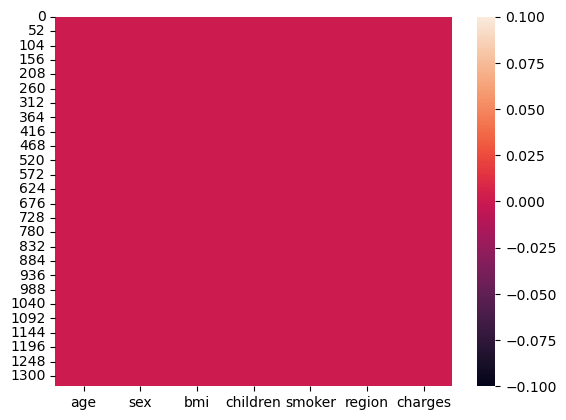

In [10]:
sns.heatmap(data.isnull())
plt.show()

In [11]:
# There are no null or missing values in our dataset

#### Display the Overall Statistics of the Dataset

In [12]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### Convert these Columns from string['Sex', 'Smoker', 'Region'] To Numerical Values

This is because Machine Learning algorithms only understand numerical values

In [13]:
# check for the unique values in the sex column
data['sex'].unique()

array(['female', 'male'], dtype=object)

In [14]:
# Convert the female and male to 0 and 1 using the map function
data['sex'].map({'female': 0, 'male': 1})

0       0
1       1
2       1
3       1
4       1
       ..
1333    1
1334    0
1335    0
1336    0
1337    0
Name: sex, Length: 1338, dtype: int64

In [15]:
# Modify the existing dataframe with this newly mapped values
data['sex'] = data['sex'].map({'female': 0, 'male': 1})

In [16]:
# Display the first 5 rows to check for the newly converted sex column
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [17]:
# let's now map the smoker column of bool datatype to 0 and 1
data['smoker'] = data['smoker'].map({'yes': 1, 'no': 0})

In [18]:
# display first 5 rows to check for the newly converted smoker column
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [19]:
# first of all, let's check the available unique values for the region column
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [20]:
# now we map the region column of string datatype to 0 and 1 numerical values
data['region'] = data['region'].map({'southwest': 1, 'southeast': 2,
                                    'northwest': 3, 'northeast': 4})

In [21]:
# display first 5 rows to check for the newly converted region column
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


#### Store Feature Matrix in X and Response or Target in Vector y

Store Independent and Dependent Variables Separately

In [22]:
data.columns 

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [23]:
X = data.drop(['charges'], axis=1) #Independent/feature variable store & dependent var droped

In [24]:
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,1
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,3
4,32,1,28.880,0,0,3
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3
1334,18,0,31.920,0,0,4
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,1


In [25]:
y = data['charges'] #dependent/target variable stored 

In [26]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

#### Train_Test_Split Method

1. Split data into two parts: Training set and Testing set
2. Train the Model(s) on training set
3. Test the Model(s) on Testing set

In [27]:
# Train_test_split method help evaluates the performance of the model
from sklearn.model_selection import train_test_split

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [29]:
y_train

560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
486     12475.35130
           ...     
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
1126    10214.63600
Name: charges, Length: 1070, dtype: float64

#### Import relevant models

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR #support vector regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

#### Model Training

We have to use fit method

In [31]:
lr = LinearRegression()
lr.fit(X_train, y_train)
svm = SVR()
svm.fit(X_train, y_train)
rf= RandomForestRegressor()
rf.fit(X_train, y_train)
gr = GradientBoostingRegressor()
gr.fit(X_train, y_train)

GradientBoostingRegressor()

#### Prediction on Test Data

In [32]:
y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = rf.predict(X_test)
y_pred4 = gr.predict(X_test)

# Create a new DataFrame to compare it easily
df1 = pd.DataFrame({'Actual_values': y_test, 'Lr': y_pred1,
                   'svm': y_pred2, 'rf': y_pred3, 'gr': y_pred4})

In [33]:
df1

,Actual_values,Lr,svm,rf,gr
764,9095.06825,8924.407244,9548.261584,10813.200834,11001.128629
887,5272.17580,7116.295018,9492.515425,5055.727226,5840.174656
890,29330.98315,36909.013521,9648.758701,28368.548851,28001.980112
1293,9301.89355,9507.874691,9555.044136,9938.124362,9745.291602
259,33750.29180,27013.350008,9420.421978,34661.433833,33639.100981
...,...,...,...,...,...
109,47055.53210,39116.968669,9648.902852,47240.668843,45431.423211
575,12222.89830,11814.555568,9625.431547,12270.789312,12465.025294
535,6067.12675,7638.107736,9504.168517,6444.839864,6974.336525
543,63770.42801,40959.081722,9605.004594,46802.399813,47862.047791


#### Compare Performance Visually

So we can find the best model

In [34]:
import matplotlib.pyplot as plt

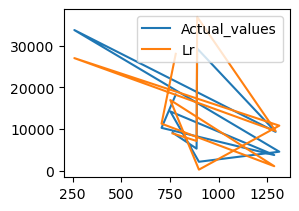

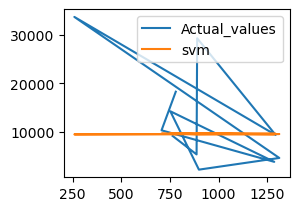

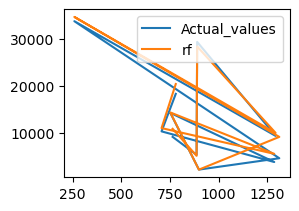

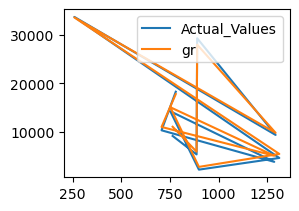

In [35]:
plt.subplot(221) # 2 rows, 2columns 1st subplot
plt.plot(df1['Actual_values'].iloc[0:11], label='Actual_values')
plt.plot(df1['Lr'].iloc[0:11], label= 'Lr')
plt.legend()
plt.show()

plt.subplot(222) # 2 rows, 2columns 2nd subplot
plt.plot(df1['Actual_values'].iloc[0:11], label='Actual_values')
plt.plot(df1['svm'].iloc[0:11], label= 'svm')
plt.legend()
plt.show()

plt.subplot(223) # 2 rows, 2columns 3rd subplot
plt.plot(df1['Actual_values'].iloc[0:11], label='Actual_values')
plt.plot(df1['rf'].iloc[0:11], label= 'rf')
plt.legend()
plt.show()

plt.subplot(224) # 2 rows, 2columns 4th subplot
plt.plot(df1['Actual_values'].iloc[0:11], label='Actual_Values')
plt.plot(df1['gr'].iloc[0:11], label= 'gr')
plt.legend()
plt.show()

##### From the plots above, we can observe that Models 3 and 4 appear to be pretty close to the actual values. Comparing Model 3 and 4, It is clear that Model 4 is better than Model 3

### Evaluate the Algorithm

#### This would help select the best model

In [36]:
from sklearn import metrics

In [37]:
score1 = metrics.r2_score(y_test, y_pred1)
score2 = metrics.r2_score(y_test, y_pred2)
score3 = metrics.r2_score(y_test, y_pred3)
score4 = metrics.r2_score(y_test, y_pred4)

In [38]:
print(score1,score2,score3,score4)

0.7833463107364539 -0.07229762787861826 0.8636519773308458 0.8779726251291786


The output results above show that Model 4 & 3 are performs better

In regression, we can also use other metrics for Model evaluation; using mean absolute error-MAE

In [39]:
s1 = metrics.mean_absolute_error(y_test, y_pred1)
s2 = metrics.mean_absolute_error(y_test, y_pred2) 
s3 = metrics.mean_absolute_error(y_test, y_pred3)
s4 = metrics.mean_absolute_error(y_test, y_pred4)

In [40]:
print(s1,s2,s3,s4)

4186.508898366434 8592.428727899724 2500.7262662151124 2447.951558054584


##### Model 4 (with MAE~2447) appears to have the lowest MAE, suggesting it's the best performing among these four based on this metric.

#### Predict Charges for New Customer

In [41]:
data = [{'age': 40,
        'sex': 1,
        'bmi': 40.30,
        'children': 4,
        'smoker': 1,
        'region': 2}]

df = pd.DataFrame(data, index=[0])
df

,age,sex,bmi,children,smoker,region
0,40,1,40.3,4,1,2


In [42]:
df

,age,sex,bmi,children,smoker,region
0,40,1,40.3,4,1,2


### Let's predict charges based on this available data; using model 4-GradientBoostingRegressor

In [43]:
new_pred = gr.predict(df)
print(new_pred)

[44757.24853851]


#### Save Model Using Joblib

We can also consider this as a deployment, so before deployment, we have to train our model on entire dataset, Not only on X_train, y_train. We did that just to evaluate our Model and to find best Model-GradientBoostinRegressor which is what we'd use to train the entire dataset before deployment.

In [44]:
# Train entire dataset using GradientBoostingRegressor
gr = GradientBoostingRegressor()
gr.fit(X, y)

GradientBoostingRegressor()

In [45]:
import joblib

In [46]:
# Save model using dump method of joblib library
joblib.dump(gr, 'model_joblib_gr')

['model_joblib_gr']

### Our Model has been saved successfully with the name model_joblib_gr. In future prediction, this saved model could be used easily. 

In [47]:
# Let's load the saved model
model = joblib.load('model_joblib_gr')

In [48]:
# Perform prediction using the saved model
model.predict(df)

array([42148.361888])

This result is more accurate compared to the last one on the new customer because our model was trained on the entire dataset

# Create GUI for the project-Insurance Cost Prediction Using Machine Learning

This GUI can be used for prediction of Charges for Newly arrived customer

In [49]:
from tkinter import *

In [50]:
# import joblib to load our saved model
import joblib

In [52]:
def show_entry():
    # Retrieve values from the input fields and convert them to floating-point numbers
    p1 = float(e1.get())
    p2 = float(e2.get())
    p3 = float(e3.get())
    p4 = float(e4.get())
    p5 = float(e5.get())
    p6 = float(e6.get())

    # Load the pre-trained machine learning model from the specified file
    model = joblib.load('model_joblib_gr')

    # Use the loaded model to make a prediction based on the input values
    result = model.predict([[p1, p2, p3, p4, p5, p6]])

    # Create and display a label to indicate what the predicted value represents
    Label(master, text = 'Insurance Cost').grid(row=7)

    # Create and display a label to show the actual prediction result
    Label(master, text = result).grid(row=8)



# Create the main window of the Tkinter application
master = Tk()
# Set the title of the application window
master.title('Insurance Cost Prediction')

# Create and display the main title label for the application, spanning across columns
label = Label(master, text = 'Insurance Cost Prediction', bg = 'black',
             fg = 'white').grid(row = 0, columnspan = True)

# Create and display labels for each input field, guiding the user on what to enter
Label(master, text = 'Enter Your Age').grid(row=1)
Label(master, text = 'Male or Female [1/0]').grid(row=2)
Label(master, text = 'Enter Your BMI Value').grid(row=3)
Label(master, text = 'Enter Number of Children').grid(row=4)
Label(master, text = 'Smoker Yes/No [1/0]').grid(row=5)
Label(master, text = 'Region [1-4]').grid(row=6)

# Create Entry widgets (text input fields) for each piece of user data
e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)


# Position the Entry widgets on the grid, next to their corresponding labels
e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)

# Create a 'Predict' button that, when clicked, will execute the show_entry function
Button(master, text= 'Predict', command=show_entry).grid()

# Start the Tkinter event loop, which keeps the window open and responsive to user interactions
master.mainloop()